In [11]:
from model import *
import matplotlib.pyplot as plt

In [12]:
def visualize_boundary(model):
    """Visualize the boundary of the model

    Args:
        model (Net): the instance of Net
    """

    # Calculate the prediction
    positive = []
    negative = []
    for x in np.linspace(-6,6,100):
        for y in np.linspace(-6,6,100):
            pos = [x,y]
            if model.forward(pos) > 0.5:
                positive.append(pos)
            else:
                negative.append(pos)
    positive = np.array(positive)
    negative = np.array(negative)
    
    plt.figure(figsize=(10,10))
    plt.scatter(negative[:,0],negative[:,1],4,"black")
    plt.show()
    print(positive.shape, negative.shape)

In [13]:
def plot_error(model):
    """Plot the error log from model

    Args:
        model (Net): the instance of Net
    """
    logs = np.array(model.logs)
    plt.figure()
    plt.plot(logs[:,0],logs[:,1],label="train")
    plt.plot(logs[:,0],logs[:,2],label="val")
    plt.legend()
    plt.show()

Epoch  500 | T 0.1723 | V 0.1697: 100%|██████████| 500/500 [00:24<00:00, 20.23epoch/s]


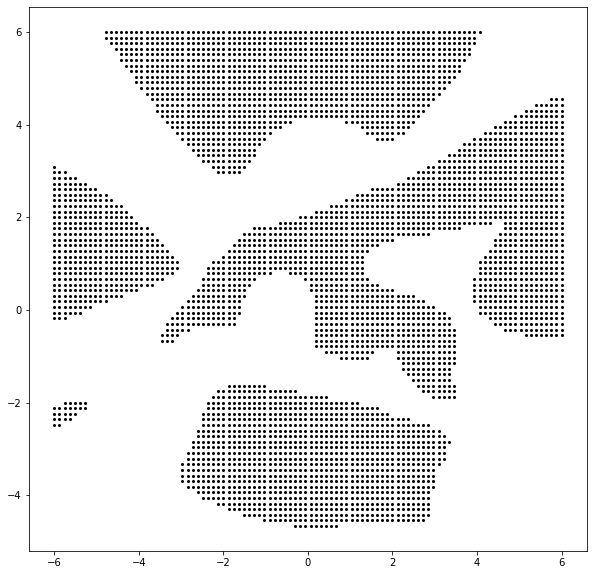

(5606, 2) (4394, 2)


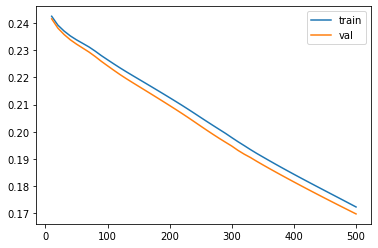

In [14]:
net = Net(0.01)

train_data = read_data("../two_spiral_train_data.txt")

train(net, train_data, 500)
visualize_boundary(net)
plot_error(net)

Epoch 1000 | T 0.1264 | V 0.1293: 100%|██████████| 500/500 [00:26<00:00, 19.18epoch/s]


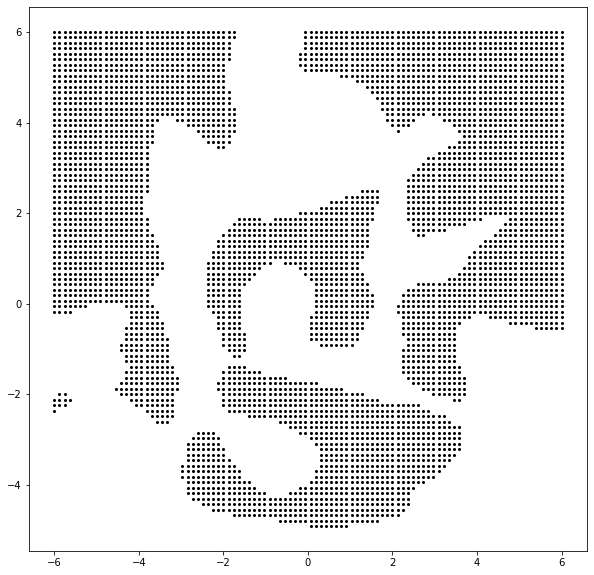

(5175, 2) (4825, 2)


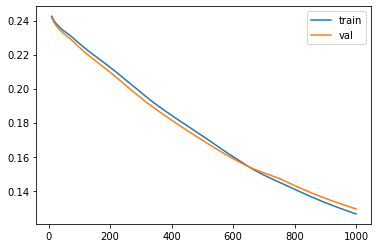

In [15]:
train(net, train_data, 500)
visualize_boundary(net)
plot_error(net)